## 08/05/2024
## Andria Lesane
## Sun Research Group – Final Report (6/30 - 8/03)

Summary: Notebook includes notes on data preparation for Orange. Preliminary ML workflow results from Orange Data Mining.

### Data Cleaning
Phase diagram data from MPDS for oxide systems appears to be incomplete and/or off scale for the temperature axis and in some cases both the temperature and atomic composition axis are incorrect. Pattern recognized in the temperature axis where the axis origin starts at zero, but the official phase diagram has the origin set at a non-zero temperature. 

To correct the data within the JSON format, the numbers were scaled and shifted to it's correct origin point so that the svgpath could create the correct size shape.
The scale factor and origin shift is specific to each metal oxide system.


Example: Chromium Oxide

Phase Diagram Referenced (From MPDS)

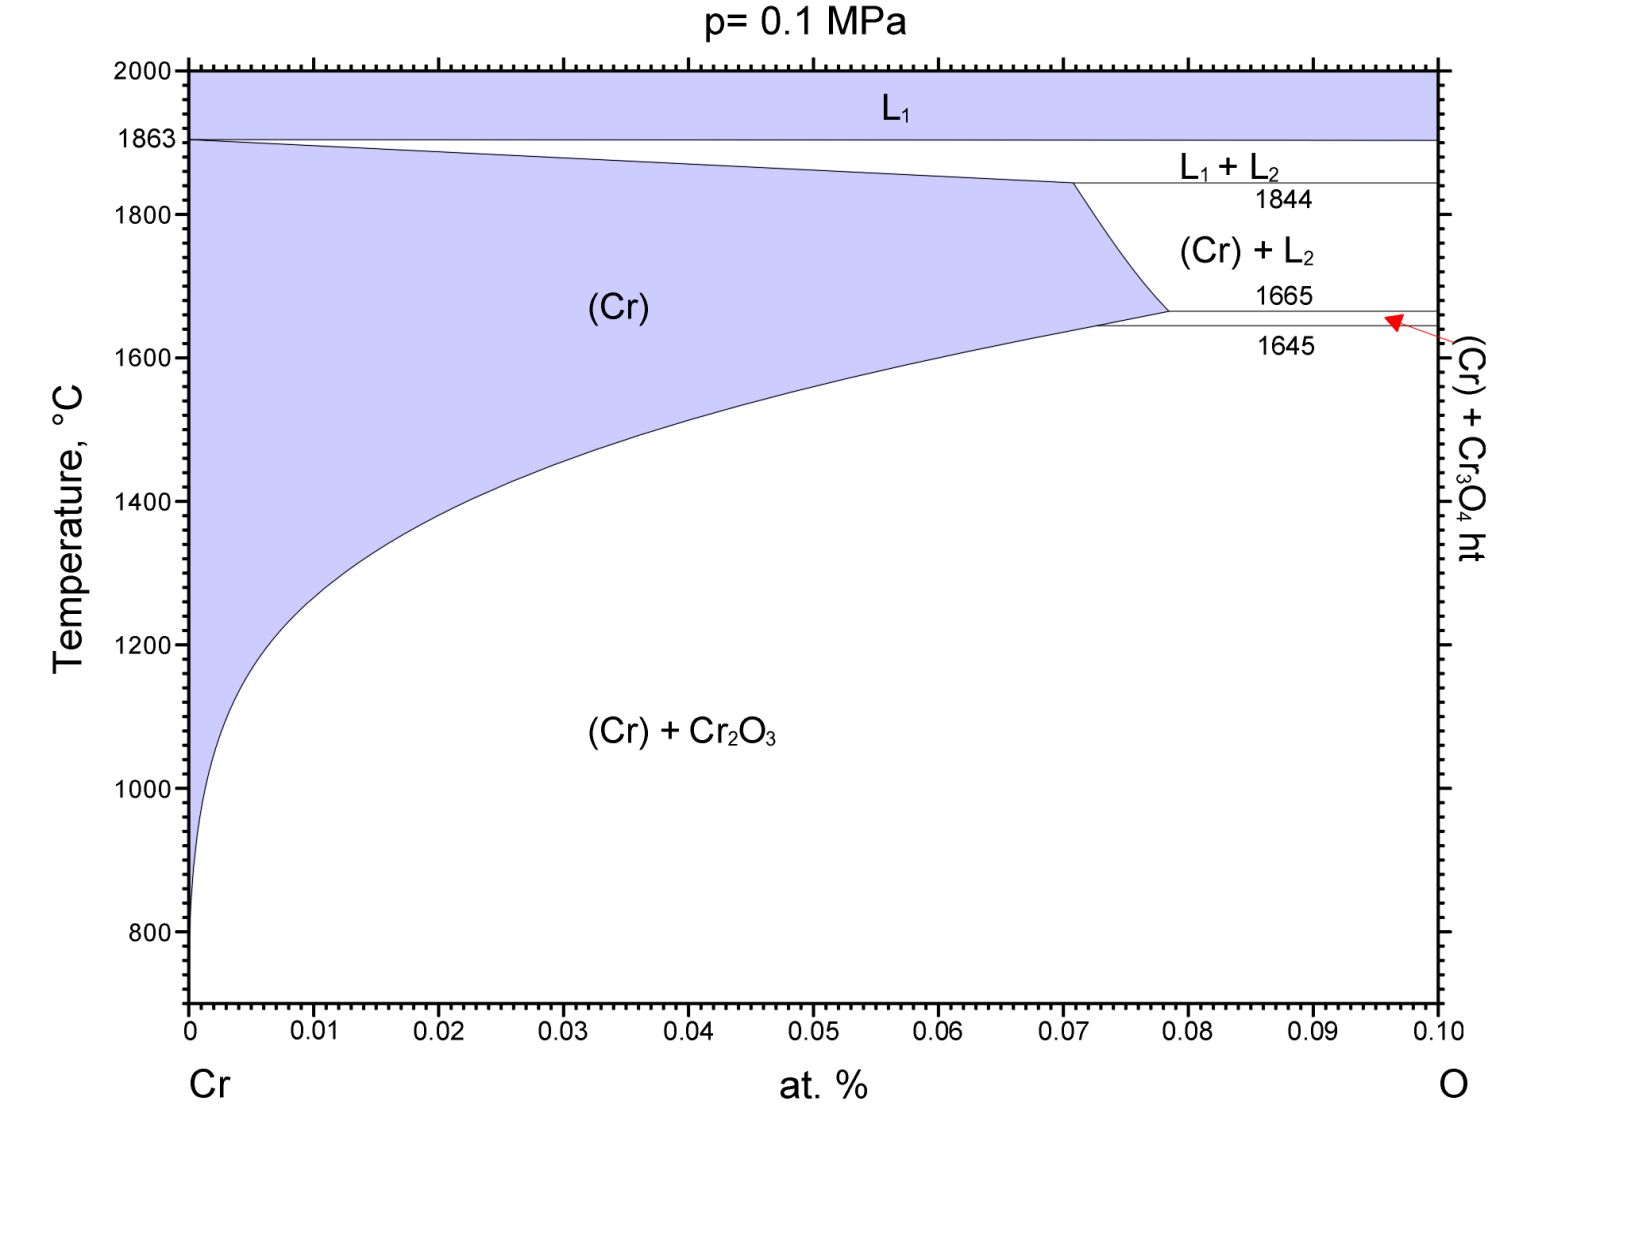

Phase Diagram generated from JSON using svgpath

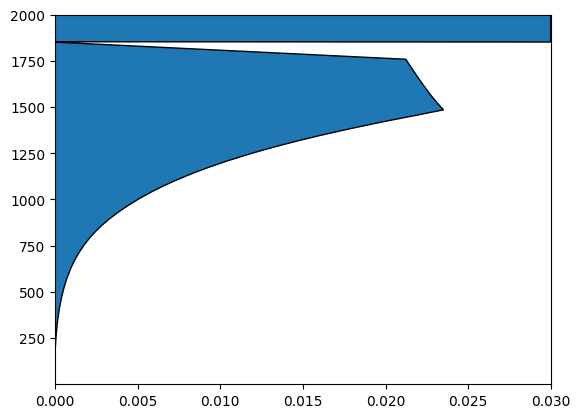


In [ ]:
#Code Used to correct the temperature and composition axis

new_vert= [[(float(i[0])/.3), (float(i[1])/1.45)+620] for i in vert]
new_path = Path(new_vert,b_code)

Result:

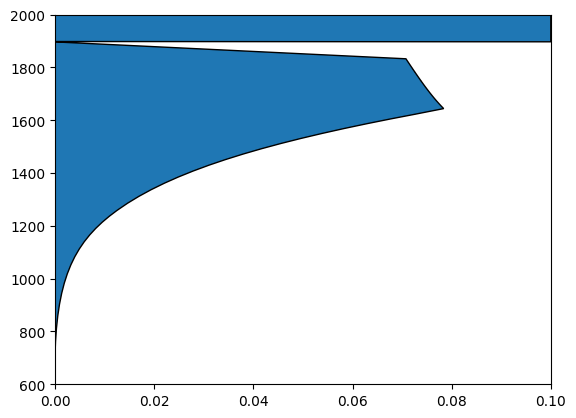



To see detailed data processing steps for each oxide system studied, refer to the system's corresponding notebook on [GitHub](https://github.com/ablesane/GSolidProject).



### Electronegativity Data using Pymatgen

Extracting supplemental data for the specified metal oxide systems to include with the regular solution mixing enthalpy calculations.

In [ ]:
from pymatgen.core import Composition, Structure, Lattice, Element
import pandas as pd

In [ ]:
#Accepts a list of elements or compounds and returns a dataframe of the requested data

def hume_rothery_data(compounds):

    data = {}
    #Electronegativity
    for compound in compounds:
        comp = Composition(compound)
        
        # the average electronetativity of a composition:
        en=comp.average_electroneg
        
        #electronegativity of each element explicitly:
        elem_en=[]
        for el in comp.keys():
            elem_en.append(el.X)
        
        data[compound] = [en,min(elem_en),max(elem_en)]
    
    return pd.DataFrame.from_dict(data, orient='index', columns=['avg_electronegativity', 'min_electronegativity', 'max_electronegativity'])

In [ ]:
data=hume_rothery_data(['FeO','CrO','CuO','MnO','AlCu','AlNi','CrO','CrZr','CuO','CuTi','CuZr','FeNb','FeTi','FeZr','NbNi','NiO','NiSn','NiTi','NiZn','NiZr','SnTi','SnZr','ZnZr'])
data['omega_mix'] = [-242102.648764969,-554786.151529341,-58422.2006852861,-450935.895719325, None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,]
data

### Orange ML Workflow

A preliminary ML pipeline was created in Orange using the electronegativity values and the calculated enthalpy mixing values.

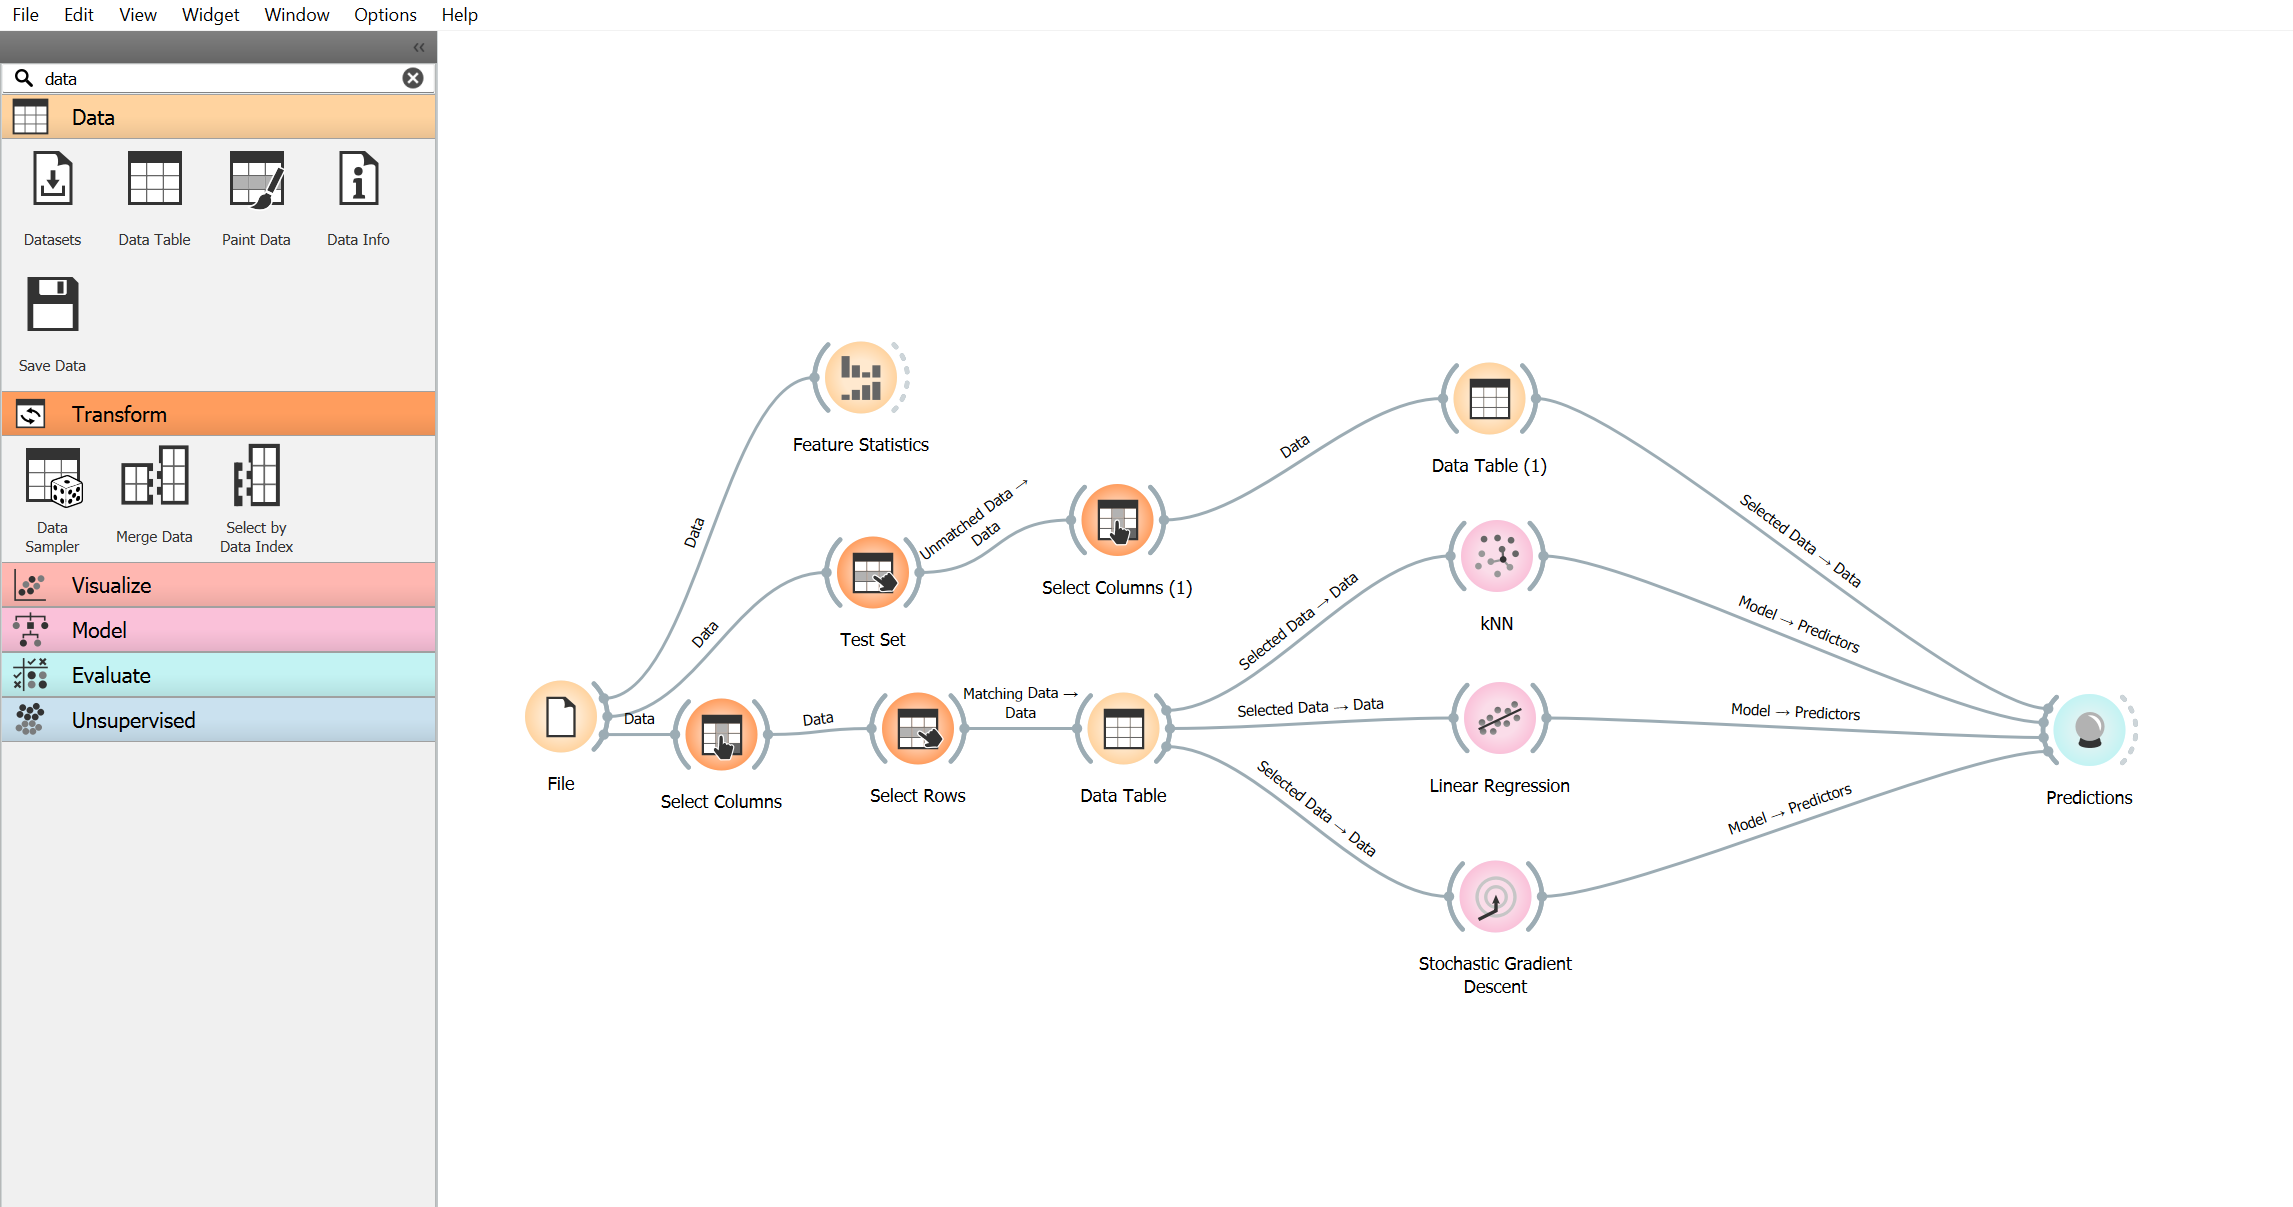

The goal of the pipeline was to predict the regular solution mixing enthalpy values based on known calculations of mixing enthalpy and the system's electronegativity.


4 systems (FeO, CrO, CuO, and MnO) were used in a small training set for various metal-metal and metal oxide systems. 

Machine Learning methods applied inculded Stochastic Gradient Descent, Linear Regression, and k-Nearest Neighbors.

A larger training set is required to do an true assesment of the validity of each method, however it appears the training set can only make realistic predictions on other metal oxide systems. 

This is expected as there are only metal oxide systems in the training set. The addition of metal-metal- systems with known/calculated regular solution mixing enthalpy to the training set will be valuable in predicting the term in other metal-metal systems.


#####Predictions Result from Orange ML

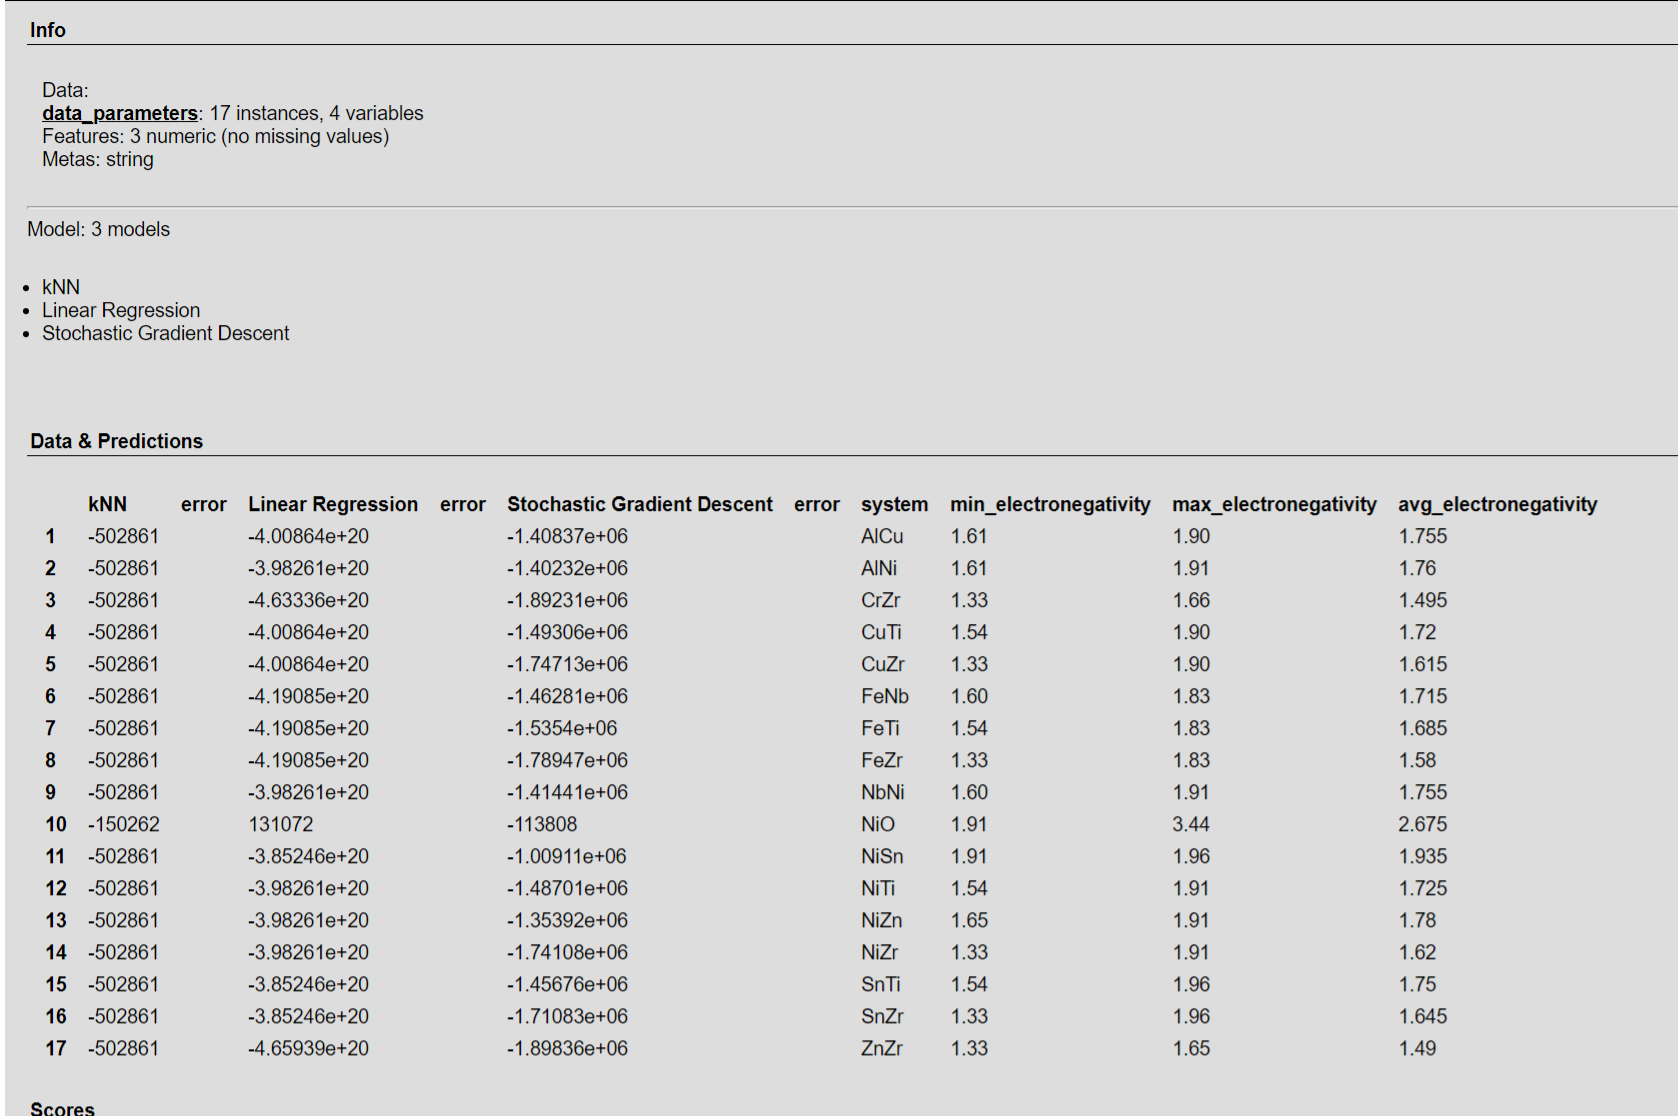